## Zadanie domowe: BBHE i DSIHE

W klasycznym wyrównywaniu histogramu HE  po wykonaniu operacji jasność obrazu ulega zmianie.
Dało się to zaobserwować podczas przeprowadzonych eksperymentów.
Jeśli nie to należy uruchomić skrypt z sekcji A i zwrócić na to uwagę.
Średnia jasność dąży do środkowego poziomu szarości.
Jest to wada i dlatego klasyczne HE ma ograniczone zastosowanie.

Powstało sporo metod, które eliminują to niekorzystne zjawisko.
Najprostsze z nich polegają na dekompozycji obrazu wejściowego na dwa podobrazy (wg. pewnego kryterium).
Następnie operacja HE wykonywana jest dla tych podobrazów.

Dwie znane z literatury metody to:
- Bi-Histogram Equalization
- DSIHE - Dualistic Sub-Image Histogram Equalization

W metodzie BBHE za kryterium podziału przyjmuje się średnią jasność w obrazie.
W DSIHE obraz dzieli się na dwa podobrazy o takiej samej liczbie pikseli (jaśniejszych i ciemniejszych).

W ramach zadania należy zaimplementować wybraną metodę: BBHE lub DSIHE (ew. obie).

1. Wczytaj obraz *jet.bmp* i wylicz jego histogram.
2. W kolejnym kroku należy wyznaczyć próg podziału obrazu na dwa podobrazy (*lm*).
3. Dla BBHE wyznacz średnią jasność obrazu. Dla DSIHE można wykorzystać histogram skumulowany.
Należy znaleźć poziom jasności który znajduje się "w połowie" histogramu skumulowanego.
W tym celu warto stworzyć tablicę, zawierającą moduł histogramu skumulowanego pomniejszonego o połowę liczby pikseli.
Następnie znaleźć minimum.
4. Dalej należy podzielić histogram oryginalnego obrazu na dwa histogramy *H1* i *H2*.
Dla każdego z nich wyliczyć histogram skumulowany ($C_1$ i $C_2$) i wykonać normalizację.
Normalizacja polega na podzieleniu każdego histogramu przez jego największy element.
5. Na podstawie histogramów skumulowanych należy stworzyć przekształcenie LUT.
Należy tak przeskalować $C_1$ i $C_2$, aby uzyskać jednorodne przekształcenie.
Tablicę $C_1$ wystarczy pomnożyć przez próg podziału.
Tablicę $C_2$ należy przeskalować do przedziału: $<lm+1; 255>$, gdzie $lm$ jest progiem podziału.<br>
$C_{1n} = (lm)*C1;$<br>
$C_{2n} = lm+1 + (255-lm-1)*C2;$<br>
Następnie dwie części tablicy przekodowań należy połączyć.
6. Ostatecznie należy wykonać operację LUT i wyświetlić wynik wyrównywania histogramu.
Porównaj wynik operacji BBHE lub DSIHE z klasycznym HE.

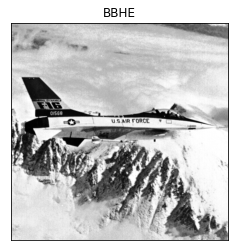

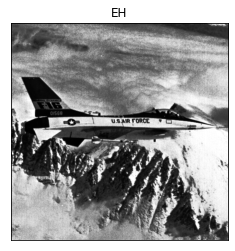

In [88]:
import cv2
import os
from matplotlib import pyplot as plt
import numpy as np

if not os.path.exists("jet.bmp") :
    !wget https://raw.githubusercontent.com/vision-agh/poc_sw/master/03_Histogram/jet.bmp --no-check-certificate

I_JET = cv2.imread("jet.bmp", cv2.IMREAD_GRAYSCALE)
I_JET_HIST = cv2.calcHist([I_JET], [0], None, [256], [0, 255])

I_JET_BRIGHTNESS_MEAN = int(np.mean(I_JET))

I_JET_HIST_1 = I_JET_HIST[0:I_JET_BRIGHTNESS_MEAN]
I_JET_HIST_2 = I_JET_HIST[I_JET_BRIGHTNESS_MEAN:256]

C1 = I_JET_HIST_1.cumsum() / np.max(I_JET_HIST_1)
C2 = I_JET_HIST_2.cumsum() / np.max(I_JET_HIST_2)

C1 = I_JET_BRIGHTNESS_MEAN * C1
C2 = I_JET_BRIGHTNESS_MEAN + 1 + (255 - I_JET_BRIGHTNESS_MEAN - 1) * C2

C1 = cv2.normalize(C1, None, 0, I_JET_BRIGHTNESS_MEAN, cv2.NORM_MINMAX)
C2 = cv2.normalize(C2, None, I_JET_BRIGHTNESS_MEAN, 255, cv2.NORM_MINMAX)

C_SUM = np.append(C1, C2)

BBHE_IMG = cv2.LUT(I_JET, C_SUM)
plt.imshow(BBHE_IMG)
plt.xticks([])
plt.yticks([])
plt.gray()
plt.title("BBHE")
plt.show()

plt.imshow(cv2.equalizeHist(I_JET))
plt.xticks([])
plt.yticks([])
plt.gray()
plt.title("EH")
plt.show()


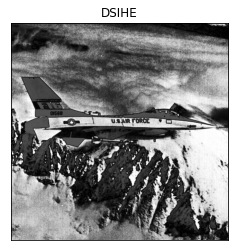

In [89]:
# nie jestem pewny czy tutaj to dobrze zrobiłem
I_JET_BRIGHTNESS_MEAN = int(min(abs(I_JET_HIST.cumsum()) - len(I_JET_HIST.cumsum())/2))

I_JET_HIST_1 = I_JET_HIST[0:I_JET_BRIGHTNESS_MEAN]
I_JET_HIST_2 = I_JET_HIST[I_JET_BRIGHTNESS_MEAN:256]

C1 = I_JET_HIST_1.cumsum() / np.max(I_JET_HIST_1)
C2 = I_JET_HIST_2.cumsum() / np.max(I_JET_HIST_2)

C1 = I_JET_BRIGHTNESS_MEAN * C1
C2 = I_JET_BRIGHTNESS_MEAN + 1 + (255 - I_JET_BRIGHTNESS_MEAN - 1) * C2

C1 = cv2.normalize(C1, None, 0, I_JET_BRIGHTNESS_MEAN, cv2.NORM_MINMAX)
C2 = cv2.normalize(C2, None, I_JET_BRIGHTNESS_MEAN, 255, cv2.NORM_MINMAX)

C_SUM = np.append(C1, C2)

BBHE_IMG = cv2.LUT(I_JET, C_SUM)
plt.imshow(BBHE_IMG)
plt.xticks([])
plt.yticks([])
plt.gray()
plt.title("DSIHE")
plt.show()



